<a href="https://colab.research.google.com/github/BhoomikaPalani/job-analysis/blob/main/Job_market_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the dataset manually
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("india_job_market_dataset.csv")

# Display first 5 rows
df.head()


Saving india_job_market_dataset.csv to india_job_market_dataset.csv


,Job ID,Job Title,Company Name,Job Location,Job Type,Salary Range,Experience Required,Posted Date,Application Deadline,Job Portal,Number of Applicants,Education Requirement,Skills Required,Remote/Onsite,Company Size
0,JOB1,Software Engineer,Amazon,Ahmedabad,Full-time,5-8 LPA,2-5 years,2025-01-16,2025-01-25,LinkedIn,23,PhD,"C++, SQL, Python",Remote,Small (1-50)
1,JOB2,Marketing Executive,Infosys,Ahmedabad,Internship,5-8 LPA,2-5 years,2024-12-25,2025-01-19,Indeed,462,MBA,"SQL, C++, Python",Remote,Large (500+)
2,JOB3,Financial Analyst,Deloitte,Jaipur,Contract,20+ LPA,5-10 years,2025-01-22,2025-01-29,Naukri.com,430,M.Tech,"Machine Learning, Excel, React",Remote,Large (500+)
3,JOB4,Business Analyst,Amazon,Delhi,Full-time,20+ LPA,2-5 years,2025-01-07,2025-02-06,LinkedIn,387,B.Tech,"Machine Learning, Python, SQL",Hybrid,Small (1-50)
4,JOB5,Software Engineer,Infosys,Delhi,Full-time,12-20 LPA,10+ years,2024-12-26,2025-01-08,Indeed,199,MBA,"UI/UX, C++, Java",Onsite,Small (1-50)


In [2]:
#Step 2: Data Cleaning and Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'Posted Date' to datetime format
df['Posted Date'] = pd.to_datetime(df['Posted Date'], errors='coerce')

# Convert 'Application Deadline' to datetime format
df['Application Deadline'] = pd.to_datetime(df['Application Deadline'], errors='coerce')

# Cleaning 'Salary Range' - Extract numeric values
df['Salary Range'] = df['Salary Range'].astype(str).str.replace('[^0-9\-]', '', regex=True)

# Split Salary Range into Min and Max Salary
df[['Min Salary', 'Max Salary']] = df['Salary Range'].str.split('-', expand=True)

# Convert to numeric
df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')

# Fill missing salary values with median salary
df['Min Salary'].fillna(df['Min Salary'].median(), inplace=True)
df['Max Salary'].fillna(df['Max Salary'].median(), inplace=True)

# Display updated dataset
df.head()


Missing values:
 Job ID                   0
Job Title                0
Company Name             0
Job Location             0
Job Type                 0
Salary Range             0
Experience Required      0
Posted Date              0
Application Deadline     0
Job Portal               0
Number of Applicants     0
Education Requirement    0
Skills Required          0
Remote/Onsite            0
Company Size             0
dtype: int64


<ipython-input-2-398d7e91b2b3>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Min Salary'].fillna(df['Min Salary'].median(), inplace=True)
<ipython-input-2-398d7e91b2b3>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Job ID,Job Title,Company Name,Job Location,Job Type,Salary Range,Experience Required,Posted Date,Application Deadline,Job Portal,Number of Applicants,Education Requirement,Skills Required,Remote/Onsite,Company Size,Min Salary,Max Salary
0,JOB1,Software Engineer,Amazon,Ahmedabad,Full-time,5-8,2-5 years,2025-01-16,2025-01-25,LinkedIn,23,PhD,"C++, SQL, Python",Remote,Small (1-50),5,8.0
1,JOB2,Marketing Executive,Infosys,Ahmedabad,Internship,5-8,2-5 years,2024-12-25,2025-01-19,Indeed,462,MBA,"SQL, C++, Python",Remote,Large (500+),5,8.0
2,JOB3,Financial Analyst,Deloitte,Jaipur,Contract,20,5-10 years,2025-01-22,2025-01-29,Naukri.com,430,M.Tech,"Machine Learning, Excel, React",Remote,Large (500+),20,12.0
3,JOB4,Business Analyst,Amazon,Delhi,Full-time,20,2-5 years,2025-01-07,2025-02-06,LinkedIn,387,B.Tech,"Machine Learning, Python, SQL",Hybrid,Small (1-50),20,12.0
4,JOB5,Software Engineer,Infosys,Delhi,Full-time,12-20,10+ years,2024-12-26,2025-01-08,Indeed,199,MBA,"UI/UX, C++, Java",Onsite,Small (1-50),12,20.0


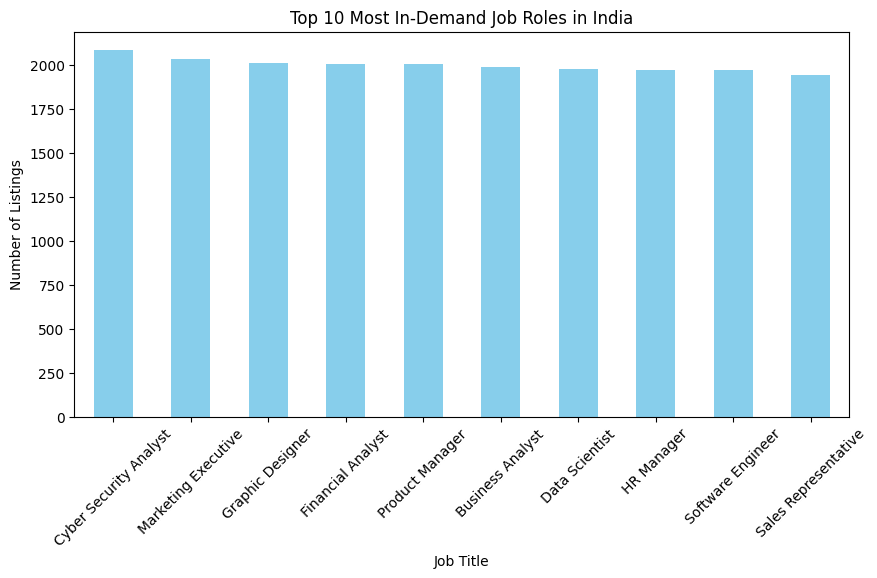

In [13]:
#Step 3: Exploratory Data Analysis (EDA)
#01.Top 10 Most In-Demand Job Titles
plt.figure(figsize=(10,5))
df['Job Title'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.xlabel("Job Title")
plt.ylabel("Number of Listings")
plt.title("Top 10 Most In-Demand Job Roles in India")
plt.xticks(rotation=45)
plt.show()


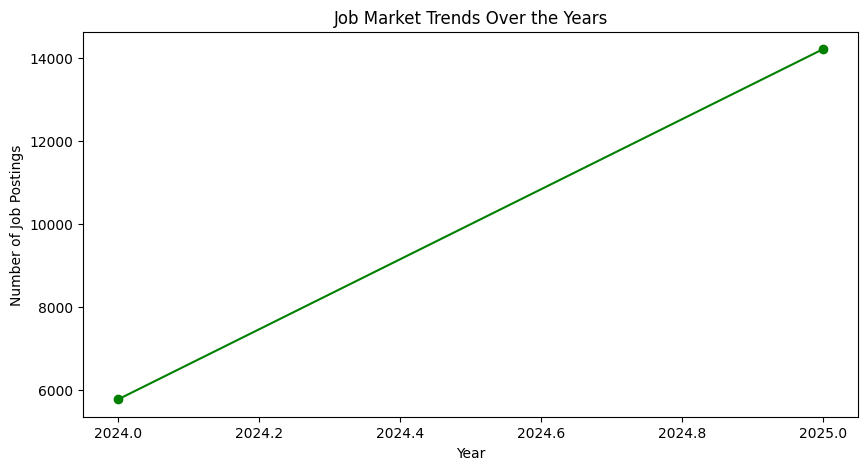

In [22]:
#02.Job Postings Over the Years
plt.figure(figsize=(10,5))
df.groupby(df['Posted Date'].dt.year)['Job ID'].count().plot(kind='line', marker='o', color='green')
plt.xlabel("Year")
plt.ylabel("Number of Job Postings")
plt.title("Job Market Trends Over the Years")
plt.show()


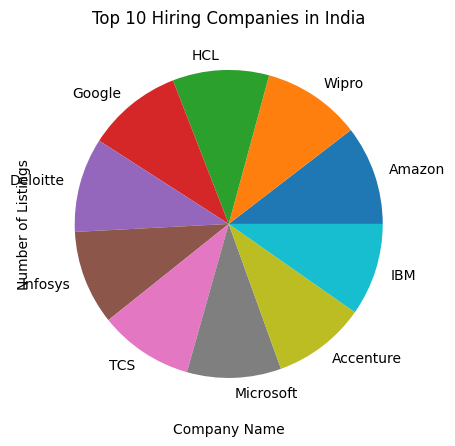

In [20]:
#03.Top Hiring Companies
plt.figure(figsize=(10,5))
df['Company Name'].value_counts().head(10).plot(kind='pie', color='pink')
plt.xlabel("Company Name")
plt.ylabel("Number of Listings")
plt.title("Top 10 Hiring Companies in India")
plt.xticks(rotation=45)
plt.show()


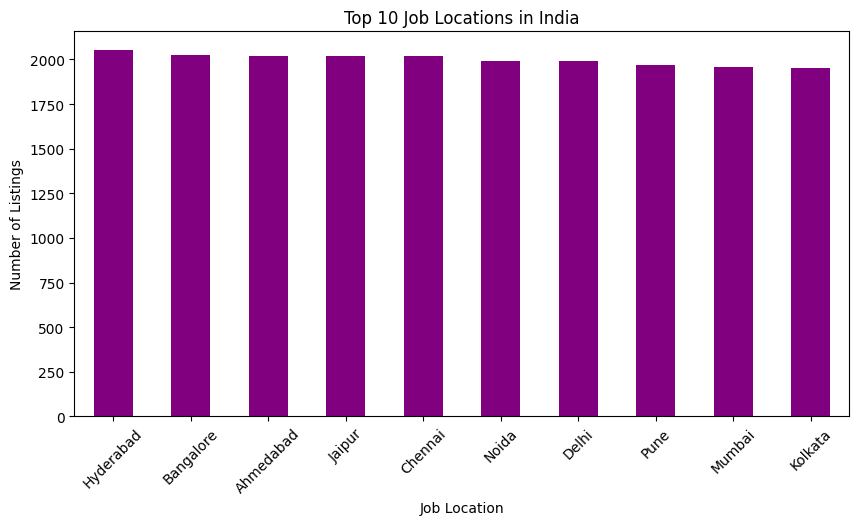

In [6]:
#04. Top Job Locations
plt.figure(figsize=(10,5))
df['Job Location'].value_counts().head(10).plot(kind='bar', color='purple')
plt.xlabel("Job Location")
plt.ylabel("Number of Listings")
plt.title("Top 10 Job Locations in India")
plt.xticks(rotation=45)
plt.show()


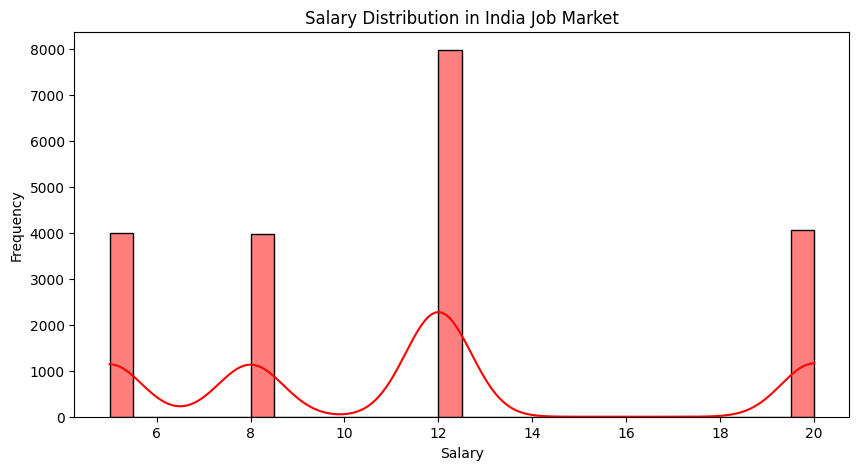

In [7]:
#05.Salary Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Max Salary'], bins=30, kde=True, color='red')
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution in India Job Market")
plt.show()


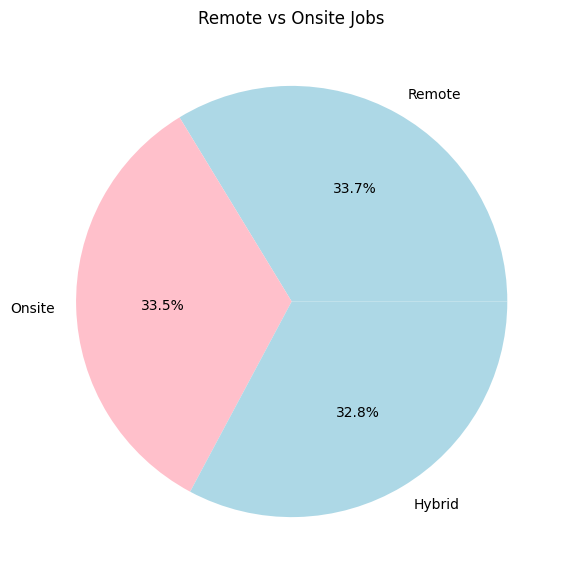

In [8]:
#06.Remote vs Onsite Jobs
plt.figure(figsize=(7,7))
df['Remote/Onsite'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Remote vs Onsite Jobs")
plt.ylabel("")  # Remove y-axis label
plt.show()


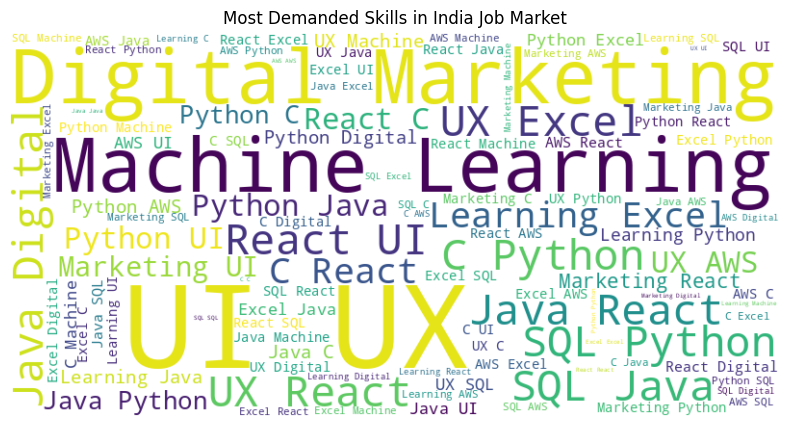

In [9]:
#07.Most Required Skills
from wordcloud import WordCloud

text = " ".join(skill for skill in df['Skills Required'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Demanded Skills in India Job Market")
plt.show()
